In [1]:
from pathlib import Path
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set_theme()
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import numpy as np
from scipy.optimize import curve_fit

In [2]:
exp_dir_arr = np.ndarray(shape=(4,2), dtype=Path)
data_dir = Path(Path.home(), "Documents/xray/sample_bench/data/7mhf")
# Synthetic benchmark score
exp_dir_arr[0,0] = Path(data_dir, "125_natives_1_state")
exp_dir_arr[0,1] = Path(data_dir, "145_native_1_state_2_cond")
exp_dir_arr[1,0] = Path(data_dir, "123_natives_2_state")
exp_dir_arr[1,1] = Path(data_dir, "124_natives_2_cond")
exp_dir_arr[2,0] = Path(data_dir, "141_native_4_state_1_cond")
exp_dir_arr[2,1] = Path(data_dir, "142_native_4_state_2_cond")
exp_dir_arr[3,0] = Path(data_dir, "151_native_N8_J1")
exp_dir_arr[3,1] = Path(data_dir, "152_native_N8_J2")

stat_dfs_arr = np.ndarray(shape=(4,2,3,10), dtype=pd.DataFrame)
y_fields_arr = np.ndarray(shape=(4,2,3), dtype=Path)
for i in range(4):
    for j in range(2):
        if j == 0:
            for k in range(10):
                stat_dfs_arr[i,j,0,k] = pd.read_csv(Path(exp_dir_arr[i,j], "volume_xray_0_{}.csv".format(k), index_col=0))
                stat_dfs_arr[i,j,1,k] = stat_dfs_arr[i,j,0,k]
                stat_dfs_arr[i,j,2,k] = pd.read_csv(Path(exp_dir_arr[i,j], "volume_rmsd_0_{}.csv".format(k), index_col=0))

            y_fields_arr[i,j,0] = "xray_0"
            y_fields_arr[i,j,1] = "rmsd_0"
            y_fields_arr[i,j,2] = "rmsd_0"
        else:
            for k in range(10):
                stat_dfs_arr[i,j,0,k] = pd.read_csv(Path(exp_dir_arr[i,j], "volume_xray_0+xray_1_{}.csv".format(k), index_col=0))
                stat_dfs_arr[i,j,1,k] = stat_dfs_arr[i,j,0,k]
                stat_dfs_arr[i,j,2,k] = pd.read_csv(Path(exp_dir_arr[i,j], "volume_rmsd_0+rmsd_1_{}.csv".format(k), index_col=0))

            y_fields_arr[i,j,0] = "xray_0+xray_1"
            y_fields_arr[i,j,1] = "rmsd_0+rmsd_1"
            y_fields_arr[i,j,2] = "rmsd_0+rmsd_1"


In [3]:
def get_min_max(dfs, field):
    all_df = pd.concat(dfs)
    field_min = all_score_df["{}_mean".format(score_field)].min()
    field_max = all_score_df["{}_mean".format(score_field)].max()

    return field_min, field_max


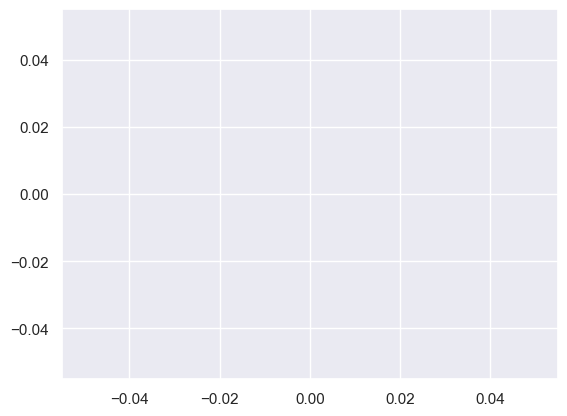

In [4]:
alpha = .5
space = 20

file_names = ["xray", "xray_rmsd", "rmsd"]

for i in range(4):
    for j in range(2):
        for plot_id in range(3):
            fig, axs = plt.subplots(2, 5, figsize=(25,8))

            for k in range(10):
                stat_df = stat_dfs_arr[i,j,plot_id,k]
                ax = axs[k//5][k%5]

                x = stat_df.index
                y = stat_df["{}_mean".format(y_fields_arr[i,j,plot_id])]
                std = stat_df["{}_std".format(y_fields_arr[i,j,plot_id])]

                ax.scatter(x[::space], y[::space], c="#424242ff", alpha=alpha)
                ax.errorbar(x[::space], y[::space], std[::space], linestyle='None', marker='o', capsize=3, c="#424242ff", alpha=alpha)

            fig_file = Path(Path.home(), "Desktop/volume_{}_{}_{}.png".format(file_names[plot_id],i,j))
            plt.savefig(fig_file)
            plt.close()

            plt.plot()

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(12,15))

fig_file = Path(Path.home(), "Desktop/volume.png".format(i,j))

space = 50
for i in range(3):
    for j in range(2):
        ax = axs[i][j]

        ax.tick_params(axis='x', labelsize=40)
        ax.tick_params(axis='y', labelsize=40)

        ax.xaxis.set_major_locator(ticker.MaxNLocator(3))
        ax.yaxis.set_major_locator(ticker.MaxNLocator(3))

        def two_decimal_places(x, pos):
            return f'{x:.2f}'
        ax.yaxis.set_major_formatter(FuncFormatter(two_decimal_places))


        stat_df = stat_dfs_arr[i,j,0,0]

        x = stat_df.index
        y = stat_df["{}_mean".format(y_fields_arr[i,j,0])]
        std = stat_df["{}_std".format(y_fields_arr[i,j,0])]

        ax.scatter(x[::space], y[::space], c="#424242ff", s=50, alpha=1)
        ax.errorbar(x[::space], y[::space], std[::space], linestyle='None', marker='o', elinewidth=3, capsize=10, c="#424242ff", alpha=1)

        # ax.set_aspect('equal', 'box')  # Ensure the aspect ratio is equal to make subplots square


plt.tight_layout()
plt.savefig(fig_file)
plt.close()
